In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

In [3]:
boston = load_boston()
data = boston.data
target = boston.target
features = boston.feature_names
s = StandardScaler()
data = s.fit_transform(data)

In [4]:
df = pd.DataFrame(data, columns = features)

In [5]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


In [6]:
df['LSTAT']

0     -1.075562
1     -0.492439
2     -1.208727
3     -1.361517
4     -1.026501
         ...   
501   -0.418147
502   -0.500850
503   -0.983048
504   -0.865302
505   -0.669058
Name: LSTAT, Length: 506, dtype: float64

In [7]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [8]:
def forward_loss(X, y, weights):
    '''
    Computes forward loss of function
    '''
    
    assert X.shape[1] == weights['W1'].shape[0]
    
    N1 = np.dot(X, weights['W1'])
    P1 = N1 + weights['B1']
    O1 = sigmoid(P1)
    
    #repeat
    N2 = np.dot(O1, weights['W2'])
    P2 = N2 + weights['B2']
    
    loss = np.mean(np.power(y - P2, 2))
    
    forward_info = {}
    forward_info['X'] = X
    forward_info['N1'] = N1
    forward_info['P1'] = P1
    forward_info['O1'] = O1
    forward_info['N2'] = N2
    forward_info['P2'] = P2
    forward_info['y'] = y
    
    return forward_info, loss

In [9]:
def loss_gradient(forward_info, weights):
    '''
    Compute the partial derivatives of the loss with respect to each of the parameters in the neural network
    '''
    
    dL_dP2 = -2 * (forward_info['y'] - forward_info['P2']) #shape = (batch_size, 1)
    
    dP2_dN2 = np.ones_like(forward_info['N2']) #shape = (batch_size, 1)
    
    dL_dN2 = dL_dP2 * dP2_dN2 #shape = (batch_size, 1)
    
    dP2_dB2 = np.ones_like(weights['B2']) #shape = (1, 1)
    
    dL_dB2 = (dL_dP2 * dP2_dB2).sum(axis=0) #shape = (batch_size, 1) --> (1,)
    
    dN2_dW2 = np.transpose(forward_info['O1'], (1, 0)) #shape = (n_size, batch_size)
    
    dL_dW2 = np.dot(dN2_dW2, dL_dN2) #shape = (n_size, 1)
    
    dN2_dO1 = np.transpose(weights['W2'], (1, 0)) #shape = (1, n_size)
    
    dL_dO1 = np.dot(dL_dN2, dN2_dO1) #shape = (batch_size, n_size)
    
    dO1_dP1 = sigmoid(forward_info['P1']) * (1-sigmoid(forward_info['P1'])) #shape = (batch_size, n_size)
    
    dL_dP1 = dL_dO1 * dO1_dP1 #shape = (batch_size, n_size)
    
    dP1_dB1 = np.ones_like(weights['B1']) #shape = (n_size, n_size)
    
    dL_dB1 = dL_dP1 * dP1_dB1.sum(axis=0) #shape = (batch_size, n_size) --> (n_size,)
              
    dP1_dN1 = np.ones_like(forward_info['N1']) #shape = (batch_size, n_size)
    
    dL_dN1 = dL_dP1 * dP1_dN1 #shape = (batch_size, n_size)
    
    dN1_dW1 = np.transpose(forward_info['X'], (1, 0)) #shape = (n_size, batch_size)
    
    dL_dW1 =  np.dot(dN1_dW1, dL_dN1) #shape = (n_size, n_size)
    
    loss_gradient = {}
    loss_gradient['W1'] = dL_dW1
    loss_gradient['B1'] = dL_dB1.sum(axis=0)
    loss_gradient['W2'] = dL_dW2
    loss_gradient['B2'] = dL_dB2.sum(axis=0)
    
    return loss_gradient

In [10]:
def init_weights(n_size, hidden_size):
    '''
    initialize weights on the forward pass
    '''
    
    weights = {}
    weights['W1'] = np.random.randn(n_size, hidden_size)
    weights['B1'] = np.random.randn(1, hidden_size)
    weights['W2'] = np.random.randn(hidden_size, 1)
    weights['B2'] = np.random.randn(1, 1)
    
    return weights

In [11]:
def generate_batch(X, y, start, batch_size):
    '''
    Generate a batch from X and y, given starting position
    '''
    
    assert X.ndim == y.ndim == 2
    
    
    # Remaining data that is not the length of batch_size
    if start + batch_size > X.shape[0]:
        batch_size = X.shape[0] - start
    
    X_batch = X[start:start+batch_size]
    y_batch = y[start:start+batch_size]
    
    return X_batch, y_batch

In [12]:
def permute_data(X, y):
    '''
    Permute X and y, using the same permutation, along axis=0
    '''
    # X.shape[0] = number of oberservations
    perm = np.random.permutation(X.shape[0])
    
    return X[perm], y[perm]

In [13]:
def train(X_train, 
          y_train, 
          X_test, 
          y_test, 
          n_iter, 
          test_every, 
          learning_rate, 
          hidden_size,
          batch_size, 
          return_losses, 
          return_weights,
          return_scores,
          seed):
    '''
    Train model for a certain number of epochs
    '''
    if seed:
        np.random.seed(seed)
    
    # Initialize weights for each characteristic in data
    weights = init_weights(X_train.shape[1], hidden_size)
    # Permute data
    X, y = permute_data(X_train, y_train)
    
    if return_losses:
        losses = []
    
    start = 0
    
    for i in range(n_iter):
        
        # Permute data again once all the data is used in a batch
        if start >= X.shape[0]:
            X, y = permute_data(X_train, y_train)
            start = 0
            
        # Generate batch
        X_batch, y_batch = generate_batch(X, y, start, batch_size)
        start += batch_size
        
        #Train net using generated batch
        forward_info, loss = forward_loss(X_batch, y_batch, weights)
        
        if return_losses:
            losses.append(loss)
            
        loss_grads = loss_gradient(forward_info, weights)
        
        for key in weights.keys():
            weights[key] -= learning_rate * loss_grads[key]
            
    if return_weights:
        return losses, weights
    
    return None

In [14]:
def predict(X, weights):
    '''
    Generates predictions from the step by step linear model used by X_test
    '''
    
    N1 = np.dot(X, weights['W1'])
    P1 = N1 + weights['B1']
    O1 = sigmoid(P1)
    N2 = np.dot(O1, weights['W2'])
    P2 = N2 + weights['B2']
    
    return P2

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=.3, random_state=80718)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [17]:
train_info = train(X_train, y_train, X_test, y_test,
                   n_iter=10000,
                   test_every = 1000,
                   learning_rate = 0.001,
                   hidden_size=13,
                   batch_size=23, 
                   return_losses=True, 
                   return_weights=True, 
                   return_scores=False,
                   seed=180807)
losses, weights = train_info

In [18]:
def mean_absolute_error(preds, actuals):
    '''
    Compute mean absolute error
    '''
    return np.mean(np.abs(actuals - preds))

In [19]:
def root_mean_squared_error(pred, actual):
    '''
    Compute root mean squared error
    '''
    return np.sqrt(np.mean(np.power(actual - pred, 2)))

In [20]:
preds = predict(X_test, weights)

In [21]:
print(f"Mean absolute error:\n{mean_absolute_error(preds,y_test)}")
print()
print(f"Root mean squared error:\n{root_mean_squared_error(preds,y_test)}")

Mean absolute error:
2.2582959551610515

Root mean squared error:
3.3345446877308595


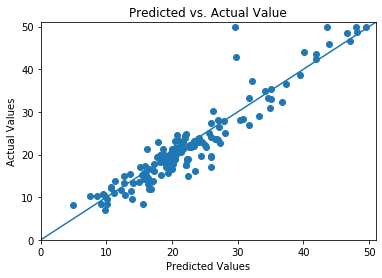

In [22]:
plt.title("Predicted vs. Actual Value")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.xlim([0, 51])
plt.ylim([0, 51])
plt.scatter(preds, y_test)
plt.plot([0, 51], [0, 51])

In [23]:
num = 40
a = np.repeat(X_test[:,: -1].mean(axis=0, keepdims=True), num, axis=0) #shape is (40, 12)
b = np.linspace(-1.5, 3.5, num).reshape(40, 1) #shape is (40, 1)
test_feature = np.concatenate([a, b], axis=1)
test_predictions = predict(test_feature, weights)#.reshape(num)
X_val = test_feature[:,-1]
y_val = test_predictions[:,0]

(6, 51)

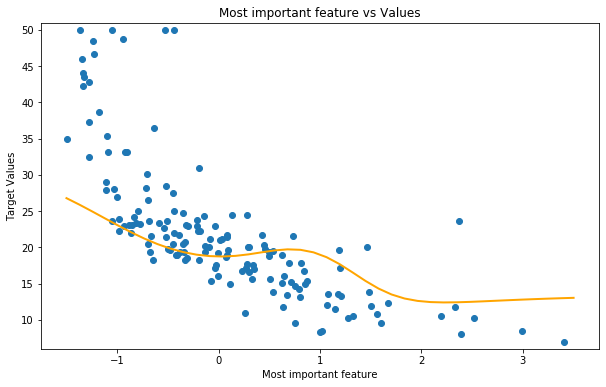

In [24]:
# x_test[:, n] returns an 1D array consisting of the nth element of every row
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 12], y_test)
plt.plot(X_val, y_val, c='orange', lw=2)
plt.title("Most important feature vs Values")
plt.xlabel("Most important feature")
plt.ylabel("Target Values")
plt.ylim([6, 51])

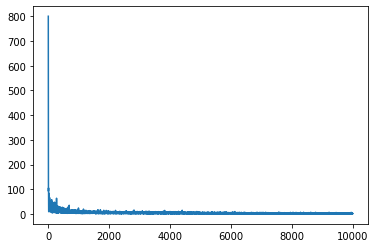

In [25]:
plt.plot(list(range(10000)), losses)